In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import TP_dect



In [4]:
pred_path = './Dataset/prediction/'
pred_list  = os.listdir(pred_path)

In [5]:
pred_sum = []
for pred_file in pred_list:
    path = os.path.join(pred_path, pred_file)
    df = pd.read_csv(path, header=None).to_numpy()
    pred_sum.append(df)

In [12]:
pred_sum[0].shape

(4934, 15)

NameError: name 'origin' is not defined

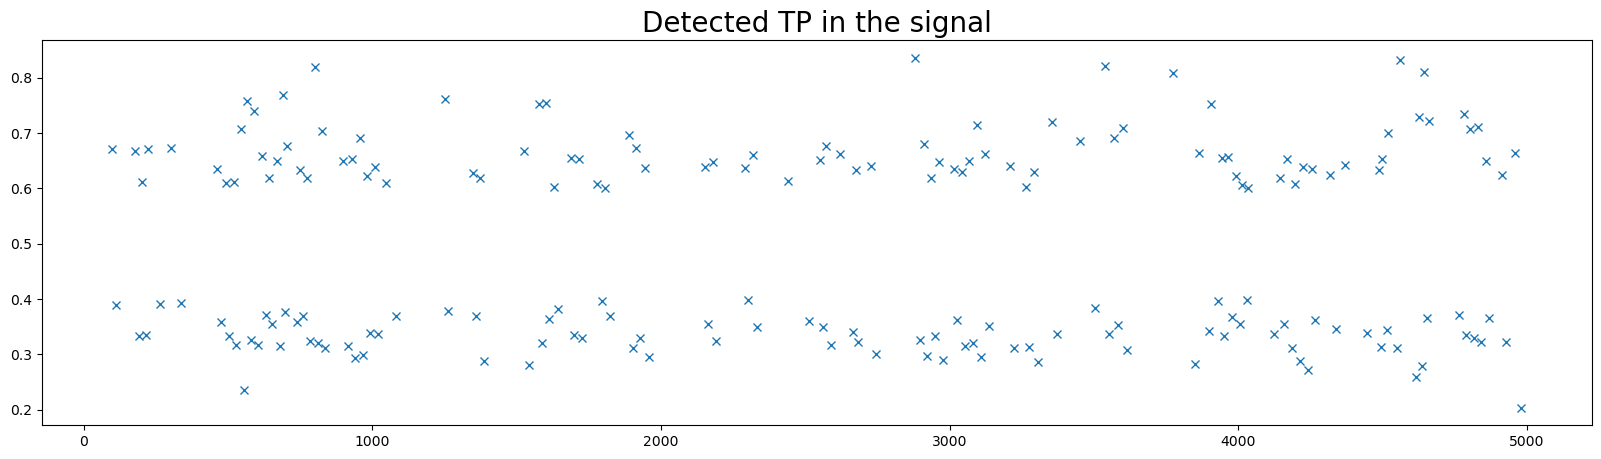

In [9]:
latency,num_slope,num_label = 6,5,15
num_input = 50
TP_det_list,TP_det_index_list = [],[]
InEx_label,last_i_arr = -1, -2
iterate_Pred = 1

# detect all TP of preprocessed signal
for i_arr in range(len(Y_arr)):
    if i_arr % iterate_Pred != 0:
        continue
    else:
        #start_time = time.time()
        
        ref_TP,label_TP = False,False
        ref_TP,label_TP = TP_dect(Y_arr[i_arr],latency,num_slope,num_label)
        if ref_TP and label_TP * InEx_label == -1:
            TP_pot_index = ref_TP + i_arr + num_input
            TP_pot       = Y_arr[i_arr][ref_TP]
            # save the TP potential
            last_pot_index,last_pot,last_pot_label,last_i_arr = TP_pot_index, TP_pot, label_TP, i_arr
            
        elif (ref_TP and i_arr - last_i_arr == iterate_Pred and label_TP * InEx_label == 1):
            TP_det_index, TP_det, InEx_label = last_pot_index, last_pot, -InEx_label
            TP_det_index_list.append(TP_det_index)
            TP_det_list.append(TP_det)
        
        # if last time has TP, this time no TP, the TP is the 'TP'
        elif (i_arr - last_i_arr == iterate_Pred and InEx_label * last_pot_label == -1):
            TP_det_index, TP_det, InEx_label = last_pot_index, last_pot, -InEx_label
            TP_det_index_list.append(TP_det_index)
            TP_det_list.append(TP_det)
# plot the all detected TP in processed signal
#'''            
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams['figure.dpi'] = 100
plt.plot(TP_det_index_list,TP_det_list,'x')
plt.title('Detected TP in the signal',fontsize = 20)
plt.plot(origin)
plt.show()
#'''